In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

import pandasql as psql

# pip install pandasql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Load the Universal Bank Marketing Campaign (BMC) data

InsClaims = pd.read_csv(r"C:\Users\Raju\IIIT-Kurnool\insurance_claims.csv", header=0)
InsClaims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# Displaying the variables information

InsClaims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
# Delete the variable '_c39'

del InsClaims['_c39']

In [5]:
# Display the column name of dataset

InsClaims.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
# Replace target variable 'police_report_available', 'Yes' to 1 , 'No' to 0 and '?' to 0  & convert values to integer.

InsClaims['fraud_reported'] = InsClaims['fraud_reported'].str.replace('Y', '1')
InsClaims['fraud_reported'] = InsClaims['fraud_reported'].str.replace('N', '0')
InsClaims['fraud_reported'] = InsClaims['fraud_reported'].astype(int)

In [7]:
InsClaims.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014/10/17,2006/06/27,2000/09/06,1990/05/25,2014/06/06
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


In [8]:
# Convert the 'incident_date' column to datetime format

InsClaims['incident_date']= pd.to_datetime(InsClaims['incident_date'])

In [9]:
# convert the 'policy_bind_date' column to datetime format

InsClaims['policy_bind_date']= pd.to_datetime(InsClaims['policy_bind_date'])

In [10]:
InsClaims.months_as_customer.max()

479

In [11]:
InsClaims.months_as_customer.min()

0

In [12]:
print(InsClaims.policy_annual_premium.max())
print(InsClaims.policy_annual_premium.min())

2047.59
433.33


In [13]:
InsClaims['Range-mac'] = pd.cut(x=InsClaims['months_as_customer'], bins=[-1, 20, 40, 60, 80, 100, 500],
                                labels=['0 to 20', '21 to 40', '41 to 60', '61 to 80', '81 to 100', '101 to 500'])

In [14]:
for i in InsClaims.columns:
    print(InsClaims[i].value_counts())

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
296960    1
206213    1
853360    1
521585    1
290162    1
         ..
276804    1
426708    1
963285    1
789208    1
116735    1
Name: policy_number, Length: 1000, dtype: int64
1992-08-05    3
2006-01-01    3
1992-04-28    3
2010-03-11    2
2003-03-09    2
             ..
1992-09-24    1
1991-08-02    1
1996-01-20    1
1991-04-02    1
2014-05-28    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

In [15]:
InsClaims['policy_state'].value_counts(sort=False)

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [16]:
# Convert th 'policy_state' into integer value

InsClaims['policy_state'] = InsClaims['policy_state'].str.replace('OH', '1')
InsClaims['policy_state'] = InsClaims['policy_state'].str.replace('IN', '2')
InsClaims['policy_state'] = InsClaims['policy_state'].str.replace('IL', '3')
InsClaims['policy_state'] = InsClaims['policy_state'].astype(int)

In [17]:
InsClaims['policy_csl'].value_counts(sort=False)

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [18]:
# Convert th 'policy_state' into integer value

InsClaims['policy_csl'] = InsClaims['policy_csl'].str.replace('100/300', '1')
InsClaims['policy_csl'] = InsClaims['policy_csl'].str.replace('250/500', '2')
InsClaims['policy_csl'] = InsClaims['policy_csl'].str.replace('500/1000', '3')
InsClaims['policy_csl'] = InsClaims['policy_csl'].astype(int)

In [19]:
InsClaims['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

In [20]:
InsClaims['insured_education_level'].value_counts(sort=False)

Masters        143
JD             161
MD             144
PhD            125
College        122
High School    160
Associate      145
Name: insured_education_level, dtype: int64

In [21]:
# Convert the 'insured_education_level' into interger 

InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('High School', '1')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('College', '2')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('Associate', '3')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('JD', '3')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('Masters', '4')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('MD', '4')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('PhD', '5')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].astype(int)

In [22]:
InsClaims['insured_relationship'].value_counts(sort=False)

other-relative    177
own-child         183
not-in-family     174
wife              155
husband           170
unmarried         141
Name: insured_relationship, dtype: int64

In [23]:
# Convert the 'insured_relationship' into integer

InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('own-child', '1')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('other-relative', '1')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('husband', '1')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('wife', '1')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('not-in-family', '2')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('unmarried', '2')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].astype(int)

In [24]:
InsClaims['umbrella_limit'].value_counts(sort=False)

 0           798
 9000000       5
 2000000       3
 4000000      39
 6000000      57
 8000000       8
-1000000       1
 10000000      2
 3000000      12
 5000000      46
 7000000      29
Name: umbrella_limit, dtype: int64

In [25]:
# Convert the 'umbrella_limit' variable into numeric 

InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([-1000000], 1)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([2000000], 2)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([3000000], 3)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([4000000], 4)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([5000000], 5)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([6000000], 6)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([7000000], 7)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([8000000], 8)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([9000000], 9)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([10000000], 10)

In [26]:
# Create capital gains ranges

InsClaims['CG_Range'] = pd.cut(x=InsClaims['capital-gains'], bins=[-1, 1, 10000, 20000, 30000, 40000, 50000, 
                                                                   75000, 105000],
                               labels=['0', '< 10K', '10K TO 20K', '20K TO 30K', '30K TO 40K', '40K TO 50K', 
                                       '50K TO 75K', '> 75K' ])

In [27]:
# Create capital gains ranges

InsClaims['CL_Range'] = pd.cut(x=InsClaims['capital-loss'], bins=[-115000, -75000, -50000, -40000, 
                                                                  -30000, -20000, -10000, -1, 1],
                               labels=['> -75K', '-50K TO -75K', '-40K TO -50K', '-30K TO -40K',
                                       '-20K TO -30K', '-10K TO -20K', '< -10K', '0'])

In [28]:
InsClaims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   int32         
 5   policy_csl                   1000 non-null   int32         
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [29]:
InsClaims['incident_type'].value_counts(sort=False)

Parked Car                   84
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Name: incident_type, dtype: int64

In [30]:
# Convert the 'incident_type' to intergers

InsClaims['incident_type'] = InsClaims['incident_type'].str.replace('Parked Car', '1')
InsClaims['incident_type'] = InsClaims['incident_type'].str.replace('Single Vehicle Collision', '2')
InsClaims['incident_type'] = InsClaims['incident_type'].str.replace('Multi-vehicle Collision', '3')
InsClaims['incident_type'] = InsClaims['incident_type'].str.replace('Vehicle Theft', '4')
InsClaims['incident_type'] = InsClaims['incident_type'].astype(int)

In [31]:
InsClaims['collision_type'].value_counts(sort=False)

Side Collision     276
Front Collision    254
Rear Collision     292
?                  178
Name: collision_type, dtype: int64

In [32]:
# Convert the 'collision_type' to intergers

InsClaims['collision_type'] = InsClaims['collision_type'].str.replace('Rear Collision', '1')
InsClaims['collision_type'] = InsClaims['collision_type'].str.replace('?', '1')
InsClaims['collision_type'] = InsClaims['collision_type'].str.replace('Side Collision', '2')
InsClaims['collision_type'] = InsClaims['collision_type'].str.replace('Front Collision', '3')
InsClaims['collision_type'] = InsClaims['collision_type'].astype(int)

In [33]:
InsClaims['incident_severity'].value_counts(sort=False)

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [34]:
# Convert the 'incident_severity' to intergers

InsClaims['incident_severity'] = InsClaims['incident_severity'].str.replace('Minor Damage', '1')
InsClaims['incident_severity'] = InsClaims['incident_severity'].str.replace('Trivial Damage', '2')
InsClaims['incident_severity'] = InsClaims['incident_severity'].str.replace('Major Damage', '3')
InsClaims['incident_severity'] = InsClaims['incident_severity'].str.replace('Total Loss', '4')
InsClaims['incident_severity'] = InsClaims['incident_severity'].astype(int)

In [35]:
InsClaims['authorities_contacted'].value_counts(sort=False)

Fire         223
Ambulance    196
Police       292
None          91
Other        198
Name: authorities_contacted, dtype: int64

In [36]:
# Convert the 'authorities_contacted' to intergers

InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('Police', '1')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('Fire', '2')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('Ambulance', '3')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('Other', '4')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('None', '4')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].astype(int)

In [37]:
InsClaims['incident_hour_of_the_day'].value_counts(sort=False)

0     52
1     29
2     31
3     53
4     46
5     33
6     44
7     40
8     36
9     43
10    46
11    30
12    40
13    46
14    43
15    39
16    49
17    54
18    41
19    40
20    34
21    42
22    38
23    51
Name: incident_hour_of_the_day, dtype: int64

In [38]:
# convert 'incident_hour_of_the_day' into ranges

InsClaims['Incident_Hour_Range'] = pd.cut(x=InsClaims['incident_hour_of_the_day'], bins=[-1, 4, 8, 12, 16, 20, 24],
                                labels=['12:00 AM to 04:00 AM', '04:00 AM to 08:00 AM', '08:00 AM to 12:00 PM', 
                                        '12:00 PM to 04:00 PM', '04:00 PM to 08:00 PM', '08:00 PM to 12:00 AM'])

In [39]:
InsClaims['number_of_vehicles_involved'].value_counts(sort=False)

1    581
2     30
3    358
4     31
Name: number_of_vehicles_involved, dtype: int64

In [40]:
InsClaims['property_damage'].value_counts(sort=False)

NO     338
YES    302
?      360
Name: property_damage, dtype: int64

In [41]:
# Convert 'property_damage' into integers

InsClaims['property_damage'] = InsClaims['property_damage'].str.replace('NO', '0')
InsClaims['property_damage'] = InsClaims['property_damage'].str.replace('YES', '1')
InsClaims['property_damage'] = InsClaims['property_damage'].str.replace('?', '1')
InsClaims['property_damage'] = InsClaims['property_damage'].astype(int)

In [42]:
# No changes needed to 'bodily_injuries'

InsClaims['bodily_injuries'].value_counts(sort=False)

0    340
1    328
2    332
Name: bodily_injuries, dtype: int64

In [43]:
# No changes needed to 'witnesses'

InsClaims['witnesses'].value_counts(sort=False)

0    249
1    258
2    250
3    243
Name: witnesses, dtype: int64

In [44]:
InsClaims['police_report_available'].value_counts(sort=False)

NO     343
YES    314
?      343
Name: police_report_available, dtype: int64

In [45]:
# Convert 'police_report_available' into integers

InsClaims['police_report_available'] = InsClaims['police_report_available'].str.replace('NO', '2')
InsClaims['police_report_available'] = InsClaims['police_report_available'].str.replace('YES', '1')
InsClaims['police_report_available'] = InsClaims['police_report_available'].str.replace('?', '2')
InsClaims['police_report_available'] = InsClaims['police_report_available'].astype(int)

In [46]:
InsClaims.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17 00:00:00,2006-06-27 00:00:00,2000-09-06 00:00:00,1990-05-25 00:00:00,2014-06-06 00:00:00
policy_state,1,2,1,3,3
policy_csl,2,2,1,2,3
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5,5,6,6
insured_zip,466132,468176,430632,608117,610706


In [47]:
InsClaims['auto_make'].value_counts(sort=False)

Nissan        78
Saab          80
Chevrolet     76
Audi          69
Mercedes      65
Honda         55
Ford          72
Volkswagen    68
BMW           72
Toyota        70
Accura        68
Dodge         80
Jeep          67
Suburu        80
Name: auto_make, dtype: int64

In [48]:
InsClaims['auto_model'].value_counts(sort=False)

3 Series          18
RSX               12
RAM               43
Silverado         22
Ultima            23
Tahoe             24
X6                16
95                27
M5                15
Forrestor         28
Escape            24
Pathfinder        31
A3                37
92x               28
ML350             20
Grand Cherokee    25
Neon              37
Wrangler          42
C300              18
F150              27
Accord            13
Highlander        22
Corolla           20
Fusion            21
93                25
Passat            33
Malibu            30
TL                20
MDX               36
Maxima            24
CRV               20
Jetta             35
A5                32
Civic             22
Impreza           20
Legacy            32
E400              27
Camry             28
X5                23
Name: auto_model, dtype: int64

In [49]:
# Copy to new file which will used for classification analysis

InsClaimsF1 = InsClaims.copy()

In [50]:
InsClaimsF1.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17 00:00:00,2006-06-27 00:00:00,2000-09-06 00:00:00,1990-05-25 00:00:00,2014-06-06 00:00:00
policy_state,1,2,1,3,3
policy_csl,2,2,1,2,3
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5,5,6,6
insured_zip,466132,468176,430632,608117,610706


In [63]:
InsClaimsF1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Range-mac', 'CG_Range',
       'CL_Range', 'Incident_Hour_Range'],
      dtype='object')

In [64]:
# Dropping the variables which are impacting the target variable

InsClaimsF1 = InsClaimsF1.drop(['policy_number', 'months_as_customer', 'policy_bind_date', 'insured_zip',
                                'insured_occupation', 'insured_hobbies', 'capital-gains', 'capital-loss',
                                'incident_date', 'incident_state', 'incident_city', 'incident_location',
                                'incident_hour_of_the_day', 'auto_make', 'auto_model', 'auto_year'], axis=1)

In [65]:
InsClaimsF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          1000 non-null   int64   
 1   policy_state                 1000 non-null   int32   
 2   policy_csl                   1000 non-null   int32   
 3   policy_deductable            1000 non-null   int64   
 4   policy_annual_premium        1000 non-null   float64 
 5   umbrella_limit               1000 non-null   int64   
 6   insured_sex                  1000 non-null   object  
 7   insured_education_level      1000 non-null   int32   
 8   insured_relationship         1000 non-null   int32   
 9   incident_type                1000 non-null   int32   
 10  collision_type               1000 non-null   int32   
 11  incident_severity            1000 non-null   int32   
 12  authorities_contacted        1000 non-null   int32   
 13  numb

In [66]:
# Create dummy variable for all range values

InsClaimsF1 = pd.get_dummies(InsClaimsF1, columns=['Range-mac', 'CG_Range', 'CL_Range', 
                                                   'Incident_Hour_Range', 'insured_sex'])
InsClaimsF1.head().T

,0,1,2,3,4
age,48.00,42.00,29.00,41.00,44.00
policy_state,1.00,2.00,1.00,3.00,3.00
policy_csl,2.00,2.00,1.00,2.00,3.00
policy_deductable,1000.00,2000.00,2000.00,2000.00,1000.00
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0.00,5.00,5.00,6.00,6.00
insured_education_level,4.00,4.00,5.00,5.00,3.00
insured_relationship,1.00,1.00,1.00,2.00,2.00
incident_type,2.00,4.00,3.00,2.00,4.00
collision_type,2.00,1.00,1.00,3.00,1.00


In [67]:
# Identify the dependent and Target variables

IndepVar = []
for col in InsClaimsF1.columns:
    if col != 'fraud_reported':
        IndepVar.append(col)

TargetVar = 'fraud_reported'

x = InsClaimsF1[IndepVar]
y = InsClaimsF1[TargetVar]

In [68]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F1 = x_test.copy()

In [69]:
InsClaimsF1.columns

Index(['age', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_education_level',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported',
       'Range-mac_0 to 20', 'Range-mac_21 to 40', 'Range-mac_41 to 60',
       'Range-mac_61 to 80', 'Range-mac_81 to 100', 'Range-mac_101 to 500',
       'CG_Range_0', 'CG_Range_< 10K', 'CG_Range_10K TO 20K',
       'CG_Range_20K TO 30K', 'CG_Range_30K TO 40K', 'CG_Range_40K TO 50K',
       'CG_Range_50K TO 75K', 'CG_Range_> 75K', 'CL_Range_> -75K',
       'CL_Range_-50K TO -75K', 'CL_Range_-40K TO -50K',
       'CL_Range_-30K TO -40K', 'CL_Range_-20K TO -30K',
       'CL_Range_-10K TO -20K', 'CL_Range_< -10K', 

In [70]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Conver x_train values

x_train['age'] = sc.fit_transform(x_train['age'].values.reshape(-1, 1))
x_train['policy_annual_premium'] = sc.fit_transform(x_train['policy_annual_premium'].values.reshape(-1, 1))
x_train['total_claim_amount'] = sc.fit_transform(x_train['total_claim_amount'].values.reshape(-1, 1))
x_train['injury_claim'] = sc.fit_transform(x_train['injury_claim'].values.reshape(-1, 1))
x_train['property_claim'] = sc.fit_transform(x_train['property_claim'].values.reshape(-1, 1))
x_train['vehicle_claim'] = sc.fit_transform(x_train['vehicle_claim'].values.reshape(-1, 1))

# Conver x_test values

x_test['age'] = sc.fit_transform(x_test['age'].values.reshape(-1, 1))
x_test['policy_annual_premium'] = sc.fit_transform(x_test['policy_annual_premium'].values.reshape(-1, 1))
x_test['total_claim_amount'] = sc.fit_transform(x_test['total_claim_amount'].values.reshape(-1, 1))
x_test['injury_claim'] = sc.fit_transform(x_test['injury_claim'].values.reshape(-1, 1))
x_test['property_claim'] = sc.fit_transform(x_test['property_claim'].values.reshape(-1, 1))
x_test['vehicle_claim'] = sc.fit_transform(x_test['vehicle_claim'].values.reshape(-1, 1))

# Convert to dataframes

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# KNN Algorithm

In [71]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix

accuracy = []

for a in range(1, 10, 1):
    k = a
    InsClaimsKNN = KNeighborsClassifier(n_neighbors=k)
    InsClaimsKNN.fit(x_train, y_train)
    y_pred = InsClaimsKNN.predict(x_test)
    print('KNN_K_value = ', a)
    print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred) * 100, 2)), "%")
    print("Precision:", (round(metrics.precision_score(y_test, y_pred, average='micro') * 100, 2)), '%')
    print("Recall:", (round(metrics.recall_score(y_test, y_pred, average='micro') * 100, 2)), "%")
    print("f1-score:", (round(metrics.f1_score(y_test, y_pred, average='micro') * 100, 2)), '%')
    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    print(confusion_matrix(y_test, y_pred))
    print('----------------------------------------------------------------------------------------------')

KNN_K_value =  1
Accuracy: 64.33 %
Precision: 64.33 %
Recall: 64.33 %
f1-score: 64.33 %
roc_auc_score: 0.51
[[175  45]
 [ 62  18]]
----------------------------------------------------------------------------------------------
KNN_K_value =  2
Accuracy: 71.0 %
Precision: 71.0 %
Recall: 71.0 %
f1-score: 71.0 %
roc_auc_score: 0.5
[[209  11]
 [ 76   4]]
----------------------------------------------------------------------------------------------
KNN_K_value =  3
Accuracy: 64.33 %
Precision: 64.33 %
Recall: 64.33 %
f1-score: 64.33 %
roc_auc_score: 0.478
[[183  37]
 [ 70  10]]
----------------------------------------------------------------------------------------------
KNN_K_value =  4
Accuracy: 71.0 %
Precision: 71.0 %
Recall: 71.0 %
f1-score: 71.0 %
roc_auc_score: 0.496
[[210  10]
 [ 77   3]]
----------------------------------------------------------------------------------------------
KNN_K_value =  5
Accuracy: 69.0 %
Precision: 69.0 %
Recall: 69.0 %
f1-score: 69.0 %
roc_auc_score: 0.49

# Random Forest algorithm

In [72]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier  

InsClaimsRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                     criterion='gini', max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0, min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0, n_estimators=500,
                                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                     warm_start=False)

InsClaimsRF = InsClaimsRF.fit(x_train, y_train)

# Predict the model with test data set

y1_pred = InsClaimsRF.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y1_pred))
print(classification_report(y_test, y1_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y1_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y1_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y1_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y1_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

[[209  11]
 [ 76   4]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       220
           1       0.27      0.05      0.08        80

    accuracy                           0.71       300
   macro avg       0.50      0.50      0.46       300
weighted avg       0.61      0.71      0.63       300

Accuracy: 71.0 %
Precision: 71.0 %
Recall: 71.0 %
f1-score: 71.0 %
roc_auc_score: 0.5


In [77]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier  

InsClaimsRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                     criterion='entropy', max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0, min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0, n_estimators=500,
                                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                     warm_start=False)

InsClaimsRF = InsClaimsRF.fit(x_train, y_train)

# Predict the model with test data set

y1_pred = InsClaimsRF.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y1_pred))
print(classification_report(y_test, y1_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y1_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y1_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y1_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y1_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

[[207  13]
 [ 77   3]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       220
           1       0.19      0.04      0.06        80

    accuracy                           0.70       300
   macro avg       0.46      0.49      0.44       300
weighted avg       0.58      0.70      0.62       300

Accuracy: 70.0 %
Precision: 70.0 %
Recall: 70.0 %
f1-score: 70.0 %
roc_auc_score: 0.489


In [ ]:
Accuracy: 73.33 %
Precision: 73.33 %
Recall: 73.33 %
f1-score: 73.33 %
roc_auc_score: 0.5

# Decision Tree algorithm

In [78]:
# To build the decision tree model with Under sampling 

from sklearn.tree import DecisionTreeClassifier 

InsClaimsDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                     max_depth=None, max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0, min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                     random_state=None, splitter='best')

InsClaimsDT = InsClaimsDT.fit(x_train,y_train)

# Predict with test data

y2_pred = InsClaimsDT.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y2_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y2_pred) * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y2_pred) * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y2_pred) * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

[[180  40]
 [ 48  32]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       220
           1       0.44      0.40      0.42        80

    accuracy                           0.71       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.70      0.71      0.70       300

Accuracy: 70.67 %
Precision: 44.44 %
Recall: 40.0 %
f1-score: 42.11 %
roc_auc_score: 0.609


# Logistic Regression

In [79]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

InsClaimsLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='auto', 
                                 n_jobs=None, penalty='l2', random_state=None,
                                 solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

InsClaimsLR = InsClaimsLR.fit(x_train,y_train)

# Predict the model with test data set

y3_pred = InsClaimsLR.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y3_pred))
print(classification_report(y_test, y3_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y3_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y3_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y3_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y3_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

[[206  14]
 [ 73   7]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       220
           1       0.33      0.09      0.14        80

    accuracy                           0.71       300
   macro avg       0.54      0.51      0.48       300
weighted avg       0.63      0.71      0.64       300

Accuracy: 71.0 %
Precision: 71.0 %
Recall: 71.0 %
f1-score: 71.0 %
roc_auc_score: 0.512


# Random Over Sampling technique

In [80]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print(x_over.shape)
print(y_over.shape)

(1506, 51)
(1506,)


In [81]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)
x_test_F11 = x_test.copy()

In [82]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Conver x_train values

x_train['age'] = sc.fit_transform(x_train['age'].values.reshape(-1, 1))
x_train['policy_annual_premium'] = sc.fit_transform(x_train['policy_annual_premium'].values.reshape(-1, 1))
x_train['total_claim_amount'] = sc.fit_transform(x_train['total_claim_amount'].values.reshape(-1, 1))
x_train['injury_claim'] = sc.fit_transform(x_train['injury_claim'].values.reshape(-1, 1))
x_train['property_claim'] = sc.fit_transform(x_train['property_claim'].values.reshape(-1, 1))
x_train['vehicle_claim'] = sc.fit_transform(x_train['vehicle_claim'].values.reshape(-1, 1))

# Conver x_test values

x_test['age'] = sc.fit_transform(x_test['age'].values.reshape(-1, 1))
x_test['policy_annual_premium'] = sc.fit_transform(x_test['policy_annual_premium'].values.reshape(-1, 1))
x_test['total_claim_amount'] = sc.fit_transform(x_test['total_claim_amount'].values.reshape(-1, 1))
x_test['injury_claim'] = sc.fit_transform(x_test['injury_claim'].values.reshape(-1, 1))
x_test['property_claim'] = sc.fit_transform(x_test['property_claim'].values.reshape(-1, 1))
x_test['vehicle_claim'] = sc.fit_transform(x_test['vehicle_claim'].values.reshape(-1, 1))

# Convert to dataframes

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# KNN Algorithm with Random Over Sampling

In [83]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix

accuracy = []

for a in range(1, 10, 1):
    k = a
    InsClaimsKNN = KNeighborsClassifier(n_neighbors=k)
    InsClaimsKNN.fit(x_train, y_train)
    y_pred = InsClaimsKNN.predict(x_test)
    print('KNN_K_value = ', a)
    print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred) * 100, 2)), "%")
    print("Precision:", (round(metrics.precision_score(y_test, y_pred, average='micro') * 100, 2)), '%')
    print("Recall:", (round(metrics.recall_score(y_test, y_pred, average='micro') * 100, 2)), "%")
    print("f1-score:", (round(metrics.f1_score(y_test, y_pred, average='micro') * 100, 2)), '%')
    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    print(confusion_matrix(y_test, y_pred))
    print('----------------------------------------------------------------------------------------------')

KNN_K_value =  1
Accuracy: 78.54 %
Precision: 78.54 %
Recall: 78.54 %
f1-score: 78.54 %
roc_auc_score: 0.782
[[151  65]
 [ 32 204]]
----------------------------------------------------------------------------------------------
KNN_K_value =  2
Accuracy: 71.9 %
Precision: 71.9 %
Recall: 71.9 %
f1-score: 71.9 %
roc_auc_score: 0.721
[[163  53]
 [ 74 162]]
----------------------------------------------------------------------------------------------
KNN_K_value =  3
Accuracy: 68.36 %
Precision: 68.36 %
Recall: 68.36 %
f1-score: 68.36 %
roc_auc_score: 0.679
[[125  91]
 [ 52 184]]
----------------------------------------------------------------------------------------------
KNN_K_value =  4
Accuracy: 64.16 %
Precision: 64.16 %
Recall: 64.16 %
f1-score: 64.16 %
roc_auc_score: 0.644
[[149  67]
 [ 95 141]]
----------------------------------------------------------------------------------------------
KNN_K_value =  5
Accuracy: 62.83 %
Precision: 62.83 %
Recall: 62.83 %
f1-score: 62.83 %
roc_auc_

# Random forest with Over Sampling

In [84]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier  

InsClaimsRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                     criterion='gini', max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0, min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0, n_estimators=500,
                                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                     warm_start=False)

InsClaimsRF = InsClaimsRF.fit(x_train, y_train)

# Predict the model with test data set

y1_pred = InsClaimsRF.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y1_pred))
print(classification_report(y_test, y1_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y1_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y1_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y1_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y1_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

[[187  29]
 [ 31 205]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       216
           1       0.88      0.87      0.87       236

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452

Accuracy: 86.73 %
Precision: 86.73 %
Recall: 86.73 %
f1-score: 86.73 %
roc_auc_score: 0.867


# Decision Tree with Over Sampling

In [85]:
# To build the decision tree model with Over sampling 

from sklearn.tree import DecisionTreeClassifier 

InsClaimsDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                     max_depth=None, max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0, min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                     random_state=None, splitter='best')

InsClaimsDT = InsClaimsDT.fit(x_train,y_train)

# Predict with test data

y2_pred = InsClaimsDT.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y2_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y2_pred) * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y2_pred) * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y2_pred) * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

[[170  46]
 [ 54 182]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       216
           1       0.80      0.77      0.78       236

    accuracy                           0.78       452
   macro avg       0.78      0.78      0.78       452
weighted avg       0.78      0.78      0.78       452

Accuracy: 77.88 %
Precision: 79.82 %
Recall: 77.12 %
f1-score: 78.45 %
roc_auc_score: 0.779


# Logistic Regession with Over Sampling

In [86]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

InsClaimsLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='auto', 
                                 n_jobs=None, penalty='l2', random_state=None,
                                 solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

InsClaimsLR = InsClaimsLR.fit(x_train,y_train)

# Predict the model with test data set

y3_pred = InsClaimsLR.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y3_pred))
print(classification_report(y_test, y3_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y3_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y3_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y3_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y3_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

[[126  90]
 [ 98 138]]
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       216
           1       0.61      0.58      0.59       236

    accuracy                           0.58       452
   macro avg       0.58      0.58      0.58       452
weighted avg       0.58      0.58      0.58       452

Accuracy: 58.41 %
Precision: 58.41 %
Recall: 58.41 %
f1-score: 58.41 %
roc_auc_score: 0.584


# Comparing the all regressors

In [51]:
# Copy to new file which will used for regression analysis

InsClaimsF2 = InsClaims.copy()
InsClaimsF2.sample(5).T

,7,642,448,81,161
months_as_customer,165,143,27,244,278
age,37,32,32,40,48
policy_number,429027,111874,327856,645258,139484
policy_bind_date,1990-02-03 00:00:00,2000-07-05 00:00:00,2014-08-27 00:00:00,1997-07-04 00:00:00,1999-07-24 00:00:00
policy_state,3,3,1,1,2
policy_csl,1,3,1,3,3
policy_deductable,1000,1000,500,2000,2000
policy_annual_premium,1137.03,1464.42,1008.38,1267.81,1142.62
umbrella_limit,0,0,0,5,7
insured_zip,603195,468986,472803,603123,475588


In [52]:
InsClaimsF2.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Range-mac', 'CG_Range',
       'CL_Range', 'Incident_Hour_Range'],
      dtype='object')

In [53]:
# Dropping the variables which are impacting the target variable

InsClaimsF2 = InsClaimsF2.drop(['policy_number', 'Range-mac', 'policy_bind_date', 'insured_zip',
                               'insured_occupation', 'insured_hobbies', 'capital-gains', 'capital-loss',
                               'CG_Range', 'CL_Range', 'incident_date', 'incident_type', 'collision_type', 
                               'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
                               'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
                               'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available',
                               'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
                               'auto_year', 'fraud_reported', 'Incident_Hour_Range'], axis=1)

In [54]:
# Create dummy variable for all range values

InsClaimsF2 = pd.get_dummies(InsClaimsF2, columns=['insured_sex', 'auto_make', 'auto_model'])

InsClaimsF2.head().T

,0,1,2,3,4
months_as_customer,328.0,228.0,134.0,256.0,228.0
age,48.0,42.0,29.0,41.0,44.0
policy_state,1.0,2.0,1.0,3.0,3.0
policy_csl,2.0,2.0,1.0,2.0,3.0
policy_deductable,1000.0,2000.0,2000.0,2000.0,1000.0
...,...,...,...,...,...
auto_model_Tahoe,0.0,0.0,0.0,1.0,0.0
auto_model_Ultima,0.0,0.0,0.0,0.0,0.0
auto_model_Wrangler,0.0,0.0,0.0,0.0,0.0
auto_model_X5,0.0,0.0,0.0,0.0,0.0


In [55]:
InsClaimsF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months_as_customer         1000 non-null   int64  
 1   age                        1000 non-null   int64  
 2   policy_state               1000 non-null   int32  
 3   policy_csl                 1000 non-null   int32  
 4   policy_deductable          1000 non-null   int64  
 5   policy_annual_premium      1000 non-null   float64
 6   umbrella_limit             1000 non-null   int64  
 7   insured_education_level    1000 non-null   int32  
 8   insured_relationship       1000 non-null   int32  
 9   insured_sex_FEMALE         1000 non-null   uint8  
 10  insured_sex_MALE           1000 non-null   uint8  
 11  auto_make_Accura           1000 non-null   uint8  
 12  auto_make_Audi             1000 non-null   uint8  
 13  auto_make_BMW              1000 non-null   uint8 

In [56]:
# Identify the dependent and Target variables

IndepVar = []
for col in InsClaimsF2.columns:
    if col != 'policy_annual_premium':
        IndepVar.append(col)

TargetVar = 'policy_annual_premium'

x = InsClaimsF2[IndepVar]
y = InsClaimsF2[TargetVar]

In [57]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F2 = x_test.copy()

In [58]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Conver x_train values

x_train['months_as_customer'] = sc.fit_transform(x_train['months_as_customer'].values.reshape(-1, 1))
x_train['age'] = sc.fit_transform(x_train['age'].values.reshape(-1, 1))

# Conver x_test values

x_test['age'] = sc.fit_transform(x_test['age'].values.reshape(-1, 1))
x_test['months_as_customer'] = sc.fit_transform(x_test['months_as_customer'].values.reshape(-1, 1))

# Convert to dataframes

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# KNeighborsRegressor

In [62]:
# Build the model and predict with test data

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    InsClaimsKR = neighbors.KNeighborsRegressor(n_neighbors = K)

    InsClaimsKR.fit(x_train, y_train) #fit the model
    y1_pred=InsClaimsKR.predict(x_test) #make prediction on test set
    rmse_error = round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3)
    rmse_val.append(rmse_error) #store rmse values
    
# Evaluation metrics for Regression analysis
    
    print('KNN K Value:', K)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y1_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y1_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3))
    print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y1_pred), 3) * 100, '%')
    print('R2_score:', round(metrics.r2_score(y_test, y1_pred),6))
    print('---------------------------------------------------------------------------------------')

KNN K Value: 1
Mean Absolute Error (MAE): 285.158
Mean Squared Error (MSE): 127247.574
Root Mean Squared Error (RMSE): 356.718
Mean Absolute Percentage Error (MAPE): 23.7 %
R2_score: -1.385335
---------------------------------------------------------------------------------------
KNN K Value: 2
Mean Absolute Error (MAE): 240.23
Mean Squared Error (MSE): 87766.751
Root Mean Squared Error (RMSE): 296.255
Mean Absolute Percentage Error (MAPE): 20.1 %
R2_score: -0.645243
---------------------------------------------------------------------------------------
KNN K Value: 3
Mean Absolute Error (MAE): 229.592
Mean Squared Error (MSE): 78379.089
Root Mean Squared Error (RMSE): 279.963
Mean Absolute Percentage Error (MAPE): 19.1 %
R2_score: -0.469265
---------------------------------------------------------------------------------------
KNN K Value: 4
Mean Absolute Error (MAE): 216.35
Mean Squared Error (MSE): 68895.517
Root Mean Squared Error (RMSE): 262.48
Mean Absolute Percentage Error (MAPE

<AxesSubplot:>

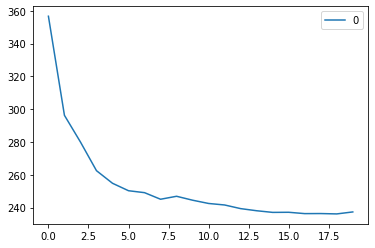

In [63]:
#plotting the rmse values against k values

curve = pd.DataFrame(rmse_val) #elbow curve 

curve.plot()

# Random Forest Regressor

In [67]:
# Build the Random forest Regressor model

from sklearn.ensemble import RandomForestRegressor

InsClaimsRR = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None, max_features='auto',
                                    max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                    min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=500, 
                                    n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False)

InsClaimsRR.fit(x_train, y_train.values.ravel())

# Predict the house value by using test data

y2_pred = InsClaimsRR.predict(x_test)

# Evaluation metrics for RF Regressor 

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y2_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y2_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y2_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y2_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y2_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y2_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 191.556
Mean Squared Error (MSE): 57389.576
Root Mean Squared Error (RMSE): 239.561
Mean Absolute Percentage Error (MAPE): 16.150000000000002 %
R2_score: -0.075804
Adj R Square:  -0.148214


# Decision Tree Regressor

In [68]:
# Build the Decision Tree Regressor model

from sklearn.tree import DecisionTreeRegressor

InsClaimsDR = DecisionTreeRegressor()
InsClaimsDR.fit(x_train, y_train)

# Predict the house value by using test data

y3_pred = InsClaimsDR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y3_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y3_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y3_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y3_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y3_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y3_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 279.595
Mean Squared Error (MSE): 117524.527
Root Mean Squared Error (RMSE): 342.819
Mean Absolute Percentage Error (MAPE): 23.369999999999997 %
R2_score: -1.203071
Adj R Square:  -1.351355
